# Xception
## Import library

In [46]:
import os
import time
import platform
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from itertools import chain
import shutil
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import to_categorical
import tensorflow.keras.applications.vgg16 
import tensorflow.keras.applications.vgg19
from tensorflow.keras.applications import Xception
import tensorflow.keras.applications.resnet50
import tensorflow.keras.applications.xception
import tensorflow.keras.applications.inception_v3
import tensorflow.keras.backend as K
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout, BatchNormalization, Input
from tensorflow.keras import initializers, Model
from tensorflow.keras import regularizers

## Function definitions

In [47]:
def build_fileDatabases(data_dir):
    os.chdir(data_dir)
    fileDatabases = []
    classNames = []

    for dirpath,dirnames ,filenames in os.walk(data_dir):        
        if filenames:     
            if platform.system() == "Linux":
                path = dirpath.split('/')
            else:
                path = dirpath.split('\\')
        else:
            continue
    
        if path[-3][0] == '#': #Nazwy folderów poprzedzone znakime # nie będą zawarte w bazie danych
            #print('contains #')
            continue
    
        for i in range(len(path)):
            if path[i] == 'Left':# or path[i] == 'Right':
                className = path[i-2]
                classNames.append(className)
    
                filenames_images = []
    
                for i in range(len(filenames)):
                    if filenames[i][-3:] == 'jpg':              
                        filenames_images.append(os.path.join(dirpath,filenames[i]))
    
                fileDatabases.append(filenames_images) 

    classNumber = len(set(classNames))
    classDict = dict(zip(set(classNames),range(classNumber)))
    print('Słownik obiektów: \n',classDict)
    return fileDatabases, classDict, classNames

def read_images(fileDatabases, img_width, img_height):
    data = []  
    for i in range(len(fileDatabases)):
        data.append([])
        for j in range(len(fileDatabases[i])): 
            image = load_img(fileDatabases[i][j], target_size=(img_height, img_width))
            image = img_to_array(image)
            image = tensorflow.keras.applications.xception.preprocess_input(image)
            data[i].append(image)
                
    return data

def build_input_data(data, classDict, classNames, test_size,random_state):
    trainX = [] 
    trainY = []    
    #valX = [] 
    #valY = []     
    testX = [] 
    testY = []     
  
    for i in range(len(data)): 
        
        labels = []
        
        for j in range(len(data[i])):
            labels.append(classNames[i])
        
        (trainX_temp, testX_temp, trainY_temp, testY_temp) = train_test_split(data[i], labels,
     	test_size=test_size, random_state=random_state)
        testX.append(testX_temp)
        testY.append(testY_temp)
        
        #(trainX_temp, testX_temp, trainY_temp, testY_temp) = train_test_split(trainX_temp, trainY_temp,
     	#test_size=valid_size, random_state=random_state) 
        
        #valX.append(testX_temp)
        #valY.append(testY_temp)
        
        trainX.append(trainX_temp)
        trainY.append(trainY_temp)
        
    trainX = list(chain.from_iterable(trainX)) 
    #valX = list(chain.from_iterable(valX))
    testX = list(chain.from_iterable(testX))
    
    trainY_long = []
    #valY_long = []
    testY_long = []
    
    for i in range(len(trainY)):
        for j in range(len(trainY[i])):
            trainY_long.append(classDict.get(trainY[i][j]))
            
    #for i in range(len(valY)):
    #    for j in range(len(valY[i])):
    #        valY_long.append(classDict.get(valY[i][j]))
            
    for i in range(len(testY)):
        for j in range(len(testY[i])):
            testY_long.append(classDict.get(testY[i][j]))
            
    trainX = np.array(trainX, dtype="float")
    print('Number of images in train set: {}'.format(trainX.shape[0]))
    #valX = np.array(valX, dtype="float")
    #print('Number of images in  validation set: {}'.format(valX.shape[0]))
    testX = np.array(testX, dtype="float")
    print('Number of images in test set: {}'.format(testX.shape[0]))
    trainY = np.array(trainY_long)
    print('Number of labels in train set: {}'.format(trainY.shape[0]))
    #valY = np.array(valY_long)
    #print('Number of labels in validation set: {}'.format(valY.shape[0]))
    testY = np.array(testY_long)
    print('Number of labels in test set: {}'.format(testY.shape[0]))
    
    trainY_cat = to_categorical(trainY)
    #valY_cat = to_categorical(valY)
    testY_cat = to_categorical(testY)
    
    return trainX, testX, trainY_cat, testY_cat # valX, , valY_cat                        

## Path creation

In [48]:
if platform.system() == "Linux":
    parentDir = "/home/cv/Models"
    modelsDir = '/home/cv/AlliedRecording1'
else:
    parentDir = "C:\\Users\\stann\\Spyder_projects\\Models"
    modelsDir = 'C:\\AlliedRecording1'

## Training parameters

In [49]:
model_name = "Xception"
img_height = 299
img_width = 299
batch_size = 32
test_size = 0.2
rotation_range=15
width_shift_range=0.1
height_shift_range=0.1
shear_range=0.1
zoom_range=0.1 #0.1
horizontal_flip=True
vertical_flip=True
fill_mode='nearest'
epochs = 200

## Build train / test sets

In [50]:
random_state = 1000
fileDatabases, classDict, classNames = build_fileDatabases(modelsDir)
data = read_images(fileDatabases, img_width, img_height)
trainX, testX, trainY_cat, testY_cat = build_input_data(data, classDict, classNames, 0.2, random_state) 

Słownik obiektów: 
 {'usb': 0, 'Auxxx': 1, 'wentylator': 2, '2xUSB': 3, 'wiatrak': 4, 'plytka': 5, 'cewka': 6, 'wyswietlacz': 7, 'wykladzina': 8, 'piny': 9, 'zlacze': 10}
Number of images in train set: 3172
Number of images in test set: 822
Number of labels in train set: 3172
Number of labels in test set: 822


## Model compilaton

In [51]:
K.clear_session() 
classNumber = len(trainY_cat[0])
core = Xception(input_shape=(img_height,img_width,3),weights='imagenet',include_top=False, classes=classNumber)

for layer in core.layers:
    layer.trainable = False
            
i = Input([img_height, img_width, 3])
x = core(i)
x = Flatten()(x)
x = Dense(64,activation='relu')(x)
x = Dense(64,activation='relu')(x)  
x = Dense(classNumber,activation='softmax')(x)
model = Model(inputs=[i], outputs=[x])
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])  

## Model training

In [52]:
test = 1
folderPath = os.path.join(parentDir,model_name+str(test))
if os.path.isdir(folderPath):
    shutil.rmtree(folderPath)       
os.makedirs(folderPath)

checkPointPath = os.path.join(folderPath,"checkpoint")
#earlyStopping = EarlyStopping(monitor = 'accuracy', patience = 15)
modelCheckpoint = ModelCheckpoint(checkPointPath, monitor = 'val_loss',save_best_only=True,save_weights_only=True)  
callbacks_list = [modelCheckpoint]  #earlyStopping,
  
imgGen_train = ImageDataGenerator(rotation_range=rotation_range, width_shift_range=width_shift_range,height_shift_range=height_shift_range,
                          shear_range=shear_range,zoom_range=zoom_range,horizontal_flip=horizontal_flip,fill_mode=fill_mode)
imgGen_train.fit(trainX)

start = time.time()
hist = model.fit(imgGen_train.flow(trainX,trainY_cat,batch_size = batch_size),
                    validation_data= (testX,testY_cat), 
                    epochs=epochs,verbose=1, callbacks=callbacks_list)
end = time.time()
elapsedTime = end - start

print('Training time: {}'.format(elapsedTime))

model.load_weights(checkPointPath)
modelPath = os.path.join(folderPath,"model")
historyPath = os.path.join(folderPath,"history.npy")
model.save(modelPath)
np.save(historyPath,hist.history)

#loss, accuracy = model.evaluate(trainX,trainY_cat,verbose=1)
#print('Accuracy in train set: {0:5.2f}'.format(accuracy))



Epoch 1/200
100/100 [==============================] - 42s 395ms/step - loss: 1.9707 - accuracy: 0.6154 - val_loss: 0.5991 - val_accuracy: 0.8175
Epoch 2/200
100/100 [==============================] - 38s 380ms/step - loss: 0.5604 - accuracy: 0.8272 - val_loss: 0.3744 - val_accuracy: 0.8856
Epoch 3/200
100/100 [==============================] - 38s 380ms/step - loss: 0.3307 - accuracy: 0.8887 - val_loss: 0.3758 - val_accuracy: 0.8820
Epoch 4/200
100/100 [==============================] - 38s 378ms/step - loss: 0.3285 - accuracy: 0.9020 - val_loss: 0.3382 - val_accuracy: 0.9075
Epoch 5/200
100/100 [==============================] - 38s 379ms/step - loss: 0.2414 - accuracy: 0.9262 - val_loss: 0.2054 - val_accuracy: 0.9428
Epoch 6/200
100/100 [==============================] - 38s 380ms/step - loss: 0.2123 - accuracy: 0.9363 - val_loss: 0.1384 - val_accuracy: 0.9550
Epoch 7/200
100/100 [==============================] - 38s 378ms/step - loss: 0.1905 - accuracy: 0.9426 - val_loss: 0.2786 -

Epoch 57/200
100/100 [==============================] - 38s 384ms/step - loss: 0.0592 - accuracy: 0.9833 - val_loss: 0.0982 - val_accuracy: 0.9805
Epoch 58/200
100/100 [==============================] - 38s 380ms/step - loss: 0.0810 - accuracy: 0.9805 - val_loss: 0.1290 - val_accuracy: 0.9708
Epoch 59/200
100/100 [==============================] - 38s 379ms/step - loss: 0.0678 - accuracy: 0.9833 - val_loss: 0.0974 - val_accuracy: 0.9793
Epoch 60/200
100/100 [==============================] - 38s 379ms/step - loss: 0.0536 - accuracy: 0.9883 - val_loss: 0.1582 - val_accuracy: 0.9684
Epoch 61/200
100/100 [==============================] - 38s 379ms/step - loss: 0.0985 - accuracy: 0.9754 - val_loss: 0.1869 - val_accuracy: 0.9538
Epoch 62/200
100/100 [==============================] - 38s 378ms/step - loss: 0.0528 - accuracy: 0.9868 - val_loss: 0.1037 - val_accuracy: 0.9781
Epoch 63/200
100/100 [==============================] - 38s 380ms/step - loss: 0.0414 - accuracy: 0.9890 - val_loss: 0

100/100 [==============================] - 38s 379ms/step - loss: 0.0420 - accuracy: 0.9909 - val_loss: 0.0669 - val_accuracy: 0.9866
Epoch 168/200
100/100 [==============================] - 38s 378ms/step - loss: 0.0213 - accuracy: 0.9934 - val_loss: 0.0877 - val_accuracy: 0.9781
Epoch 169/200
100/100 [==============================] - 38s 379ms/step - loss: 0.0198 - accuracy: 0.9943 - val_loss: 0.0841 - val_accuracy: 0.9842
Epoch 170/200
100/100 [==============================] - 38s 379ms/step - loss: 0.0262 - accuracy: 0.9934 - val_loss: 0.1415 - val_accuracy: 0.9696
Epoch 171/200
100/100 [==============================] - 38s 378ms/step - loss: 0.0379 - accuracy: 0.9905 - val_loss: 0.1380 - val_accuracy: 0.9757
Epoch 172/200
100/100 [==============================] - 38s 379ms/step - loss: 0.0215 - accuracy: 0.9927 - val_loss: 0.1301 - val_accuracy: 0.9720
Epoch 173/200
100/100 [==============================] - 38s 379ms/step - loss: 0.0362 - accuracy: 0.9883 - val_loss: 0.1182 -

C:\Users\stann\anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


## Model accuracy

In [53]:
loss, accuracy = model.evaluate(testX,testY_cat,verbose=1)
print('Accuracy in test set: {0:5.4f}'.format(accuracy))

start = time.time()
model.predict(trainX)
end = time.time()    
exec_time = end - start
print('Execution time: {}'.format(exec_time))

26/26 [==============================] - 3s 109ms/step - loss: 0.0489 - accuracy: 0.9891
Accuracy in test set: 0.9891
Execution time: 13.474879503250122


## Learning curves

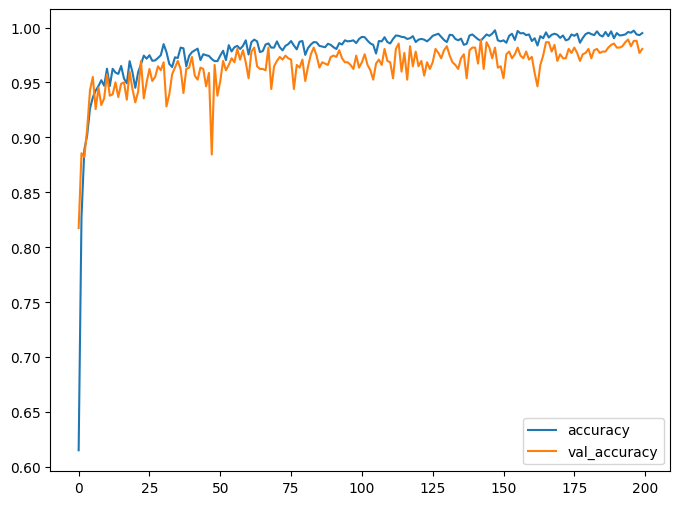

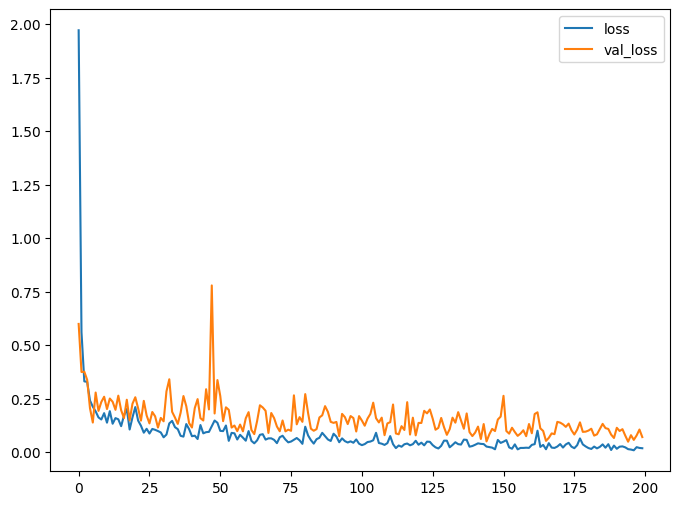

In [54]:
accuracyPlot = plt.figure()
plt.close('all')
plt.figure(1, figsize=(8,6))
plt.plot(hist.history['accuracy'],label = 'accuracy')
plt.plot(hist.history['val_accuracy'],label = 'val_accuracy')
plt.legend()
#plt.savefig('PartClassification/AccuracyNet1.png', dpi=300)

plt.figure(2, figsize=(8,6))
plt.plot(hist.history['loss'],label = 'loss')
plt.plot(hist.history['val_loss'],label = 'val_loss')
plt.legend()
#plt.savefig('PartClassification/LossNet1.png', dpi=300)
plt.show()

## Confusion matrix

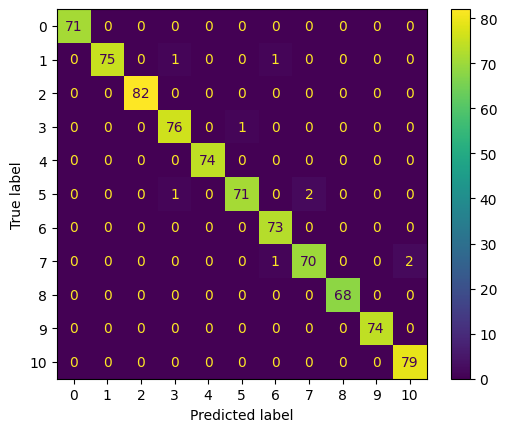

In [55]:
predictY = model.predict(testX).argmax(axis=1)
testY = np.argmax(testY_cat, axis=-1)
conf_matrix = confusion_matrix(testY,predictY)
ConfusionMatrixDisplay.from_predictions(testY,predictY)

### Test 2

In [56]:
#random_state = 1000
#fileDatabases, classDict, classNames = build_fileDatabases(modelsDir)
#data = read_images(fileDatabases, img_width, img_height)
#trainX, testX, trainY_cat, testY_cat = build_input_data(data, classDict, classNames, 0.2, random_state) 

In [57]:
K.clear_session() 
classNumber = len(trainY_cat[0])
core = Xception(input_shape=(img_height,img_width,3),weights='imagenet',include_top=False, classes=classNumber)

for layer in core.layers:
    layer.trainable = False
            
i = Input([img_height, img_width, 3])
x = core(i)
x = Flatten()(x)
x = Dense(64,activation='relu')(x)
x = Dense(64,activation='relu')(x)  
x = Dense(classNumber,activation='softmax')(x)
model = Model(inputs=[i], outputs=[x])
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])  

In [58]:
test = 2
folderPath = os.path.join(parentDir,model_name+str(test))
if os.path.isdir(folderPath):
    shutil.rmtree(folderPath)       
os.makedirs(folderPath)

checkPointPath = os.path.join(folderPath,"checkpoint")
#earlyStopping = EarlyStopping(monitor = 'accuracy', patience = 15)
modelCheckpoint = ModelCheckpoint(checkPointPath, monitor = 'val_loss',save_best_only=True,save_weights_only=True)  
callbacks_list = [modelCheckpoint]  #earlyStopping,
  
imgGen_train = ImageDataGenerator(rotation_range=rotation_range, width_shift_range=width_shift_range,height_shift_range=height_shift_range,
                          shear_range=shear_range,zoom_range=zoom_range,horizontal_flip=horizontal_flip,fill_mode=fill_mode)
imgGen_train.fit(trainX)

start = time.time()
hist = model.fit(imgGen_train.flow(trainX,trainY_cat,batch_size = batch_size),
                    validation_data= (testX,testY_cat), 
                    epochs=epochs,verbose=1, callbacks=callbacks_list)
end = time.time()
elapsedTime = end - start

print('Training time: {}'.format(elapsedTime))

model.load_weights(checkPointPath)
modelPath = os.path.join(folderPath,"model")
historyPath = os.path.join(folderPath,"history.npy")
model.save(modelPath)
np.save(historyPath,hist.history)

Epoch 1/200
100/100 [==============================] - 41s 389ms/step - loss: 1.8078 - accuracy: 0.6359 - val_loss: 0.7737 - val_accuracy: 0.7895
Epoch 2/200
100/100 [==============================] - 38s 380ms/step - loss: 0.5485 - accuracy: 0.8411 - val_loss: 0.6867 - val_accuracy: 0.8163
Epoch 3/200
100/100 [==============================] - 38s 379ms/step - loss: 0.4036 - accuracy: 0.8815 - val_loss: 0.3805 - val_accuracy: 0.8869
Epoch 4/200
100/100 [==============================] - 38s 379ms/step - loss: 0.4345 - accuracy: 0.8859 - val_loss: 0.3179 - val_accuracy: 0.8990
Epoch 5/200
100/100 [==============================] - 38s 379ms/step - loss: 0.2805 - accuracy: 0.9206 - val_loss: 0.2222 - val_accuracy: 0.9209
Epoch 6/200
100/100 [==============================] - 38s 379ms/step - loss: 0.2216 - accuracy: 0.9328 - val_loss: 0.2788 - val_accuracy: 0.9258
Epoch 7/200
100/100 [==============================] - 38s 379ms/step - loss: 0.2445 - accuracy: 0.9300 - val_loss: 0.2973 -

Epoch 57/200
100/100 [==============================] - 38s 379ms/step - loss: 0.1132 - accuracy: 0.9710 - val_loss: 0.2230 - val_accuracy: 0.9574
Epoch 58/200
100/100 [==============================] - 38s 378ms/step - loss: 0.0978 - accuracy: 0.9764 - val_loss: 0.1329 - val_accuracy: 0.9818
Epoch 59/200
100/100 [==============================] - 38s 381ms/step - loss: 0.0700 - accuracy: 0.9792 - val_loss: 0.1930 - val_accuracy: 0.9659
Epoch 60/200
100/100 [==============================] - 38s 378ms/step - loss: 0.0784 - accuracy: 0.9795 - val_loss: 0.2234 - val_accuracy: 0.9623
Epoch 61/200
100/100 [==============================] - 38s 378ms/step - loss: 0.1134 - accuracy: 0.9726 - val_loss: 0.2211 - val_accuracy: 0.9550
Epoch 62/200
100/100 [==============================] - 38s 379ms/step - loss: 0.0928 - accuracy: 0.9764 - val_loss: 0.2027 - val_accuracy: 0.9684
Epoch 63/200
100/100 [==============================] - 38s 378ms/step - loss: 0.0515 - accuracy: 0.9871 - val_loss: 0

100/100 [==============================] - 38s 378ms/step - loss: 0.0228 - accuracy: 0.9937 - val_loss: 0.1447 - val_accuracy: 0.9720
Epoch 168/200
100/100 [==============================] - 38s 379ms/step - loss: 0.0326 - accuracy: 0.9915 - val_loss: 0.1784 - val_accuracy: 0.9708
Epoch 169/200
100/100 [==============================] - 38s 381ms/step - loss: 0.0470 - accuracy: 0.9893 - val_loss: 0.1454 - val_accuracy: 0.9793
Epoch 170/200
100/100 [==============================] - 38s 379ms/step - loss: 0.0553 - accuracy: 0.9887 - val_loss: 0.1214 - val_accuracy: 0.9745
Epoch 171/200
100/100 [==============================] - 38s 379ms/step - loss: 0.0229 - accuracy: 0.9940 - val_loss: 0.0936 - val_accuracy: 0.9818
Epoch 172/200
100/100 [==============================] - 38s 379ms/step - loss: 0.0404 - accuracy: 0.9883 - val_loss: 0.1424 - val_accuracy: 0.9732
Epoch 173/200
100/100 [==============================] - 38s 378ms/step - loss: 0.0396 - accuracy: 0.9887 - val_loss: 0.0736 -

C:\Users\stann\anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


In [59]:
loss, accuracy = model.evaluate(testX,testY_cat,verbose=1)
print('Accuracy in test set: {0:5.4f}'.format(accuracy))

start = time.time()
model.predict(trainX)
end = time.time()    
exec_time = end - start
print('Execution time: {}'.format(exec_time))

26/26 [==============================] - 3s 109ms/step - loss: 0.0699 - accuracy: 0.9818
Accuracy in test set: 0.9818
Execution time: 13.062423706054688


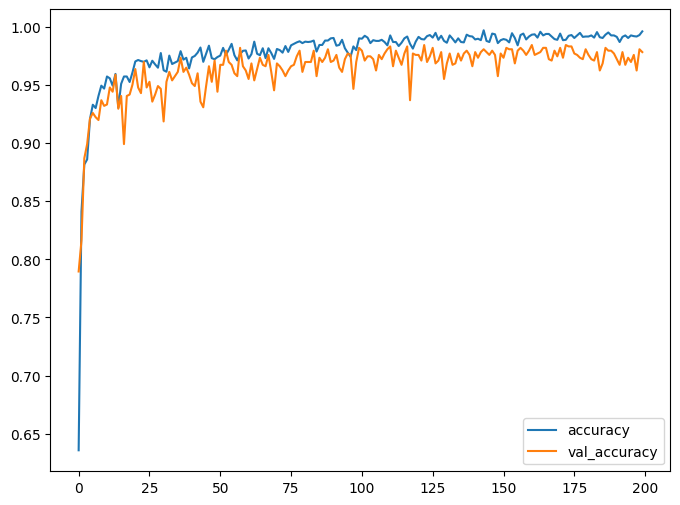

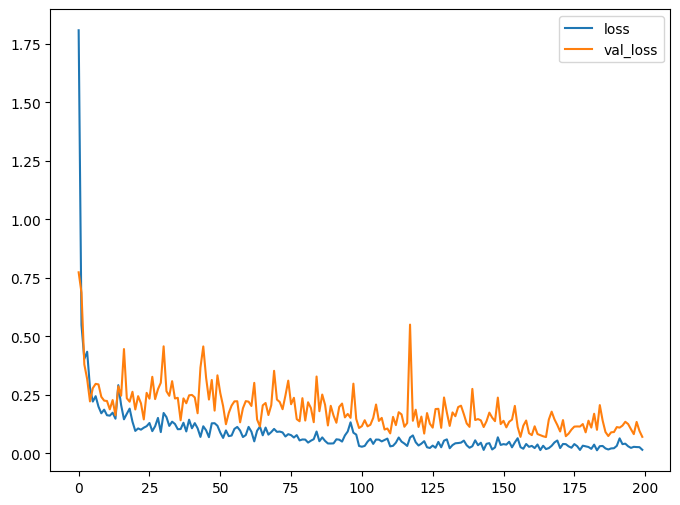

In [60]:
accuracyPlot = plt.figure()
plt.close('all')
plt.figure(1, figsize=(8,6))
plt.plot(hist.history['accuracy'],label = 'accuracy')
plt.plot(hist.history['val_accuracy'],label = 'val_accuracy')
plt.legend()
#plt.savefig('PartClassification/AccuracyNet1.png', dpi=300)

plt.figure(2, figsize=(8,6))
plt.plot(hist.history['loss'],label = 'loss')
plt.plot(hist.history['val_loss'],label = 'val_loss')
plt.legend()
#plt.savefig('PartClassification/LossNet1.png', dpi=300)
plt.show()

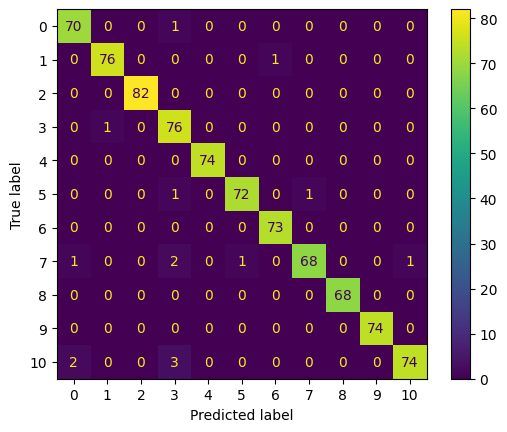

In [61]:
predictY = model.predict(testX).argmax(axis=1)
testY = np.argmax(testY_cat, axis=-1)
conf_matrix = confusion_matrix(testY,predictY)
ConfusionMatrixDisplay.from_predictions(testY,predictY)

### Test 3

In [62]:
#random_state = 1000
#fileDatabases, classDict, classNames = build_fileDatabases(modelsDir)
#data = read_images(fileDatabases, img_width, img_height)
#trainX, testX, trainY_cat, testY_cat = build_input_data(data, classDict, classNames, 0.2, random_state) 

In [63]:
K.clear_session() 
classNumber = len(trainY_cat[0])
core = Xception(input_shape=(img_height,img_width,3),weights='imagenet',include_top=False, classes=classNumber)

for layer in core.layers:
    layer.trainable = False
            
i = Input([img_height, img_width, 3])
x = core(i)
x = Flatten()(x)
x = Dense(64,activation='relu')(x)
x = Dense(64,activation='relu')(x)  
x = Dense(classNumber,activation='softmax')(x)
model = Model(inputs=[i], outputs=[x])
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])  

In [64]:
test = 3
folderPath = os.path.join(parentDir,model_name+str(test))
if os.path.isdir(folderPath):
    shutil.rmtree(folderPath)       
os.makedirs(folderPath)

checkPointPath = os.path.join(folderPath,"checkpoint")
#earlyStopping = EarlyStopping(monitor = 'accuracy', patience = 15)
modelCheckpoint = ModelCheckpoint(checkPointPath, monitor = 'val_loss',save_best_only=True,save_weights_only=True)  
callbacks_list = [modelCheckpoint]  #earlyStopping,
  
imgGen_train = ImageDataGenerator(rotation_range=rotation_range, width_shift_range=width_shift_range,height_shift_range=height_shift_range,
                          shear_range=shear_range,zoom_range=zoom_range,horizontal_flip=horizontal_flip,fill_mode=fill_mode)
imgGen_train.fit(trainX)

start = time.time()
hist = model.fit(imgGen_train.flow(trainX,trainY_cat,batch_size = batch_size),
                    validation_data= (testX,testY_cat), 
                    epochs=epochs,verbose=1, callbacks=callbacks_list)
end = time.time()
elapsedTime = end - start

print('Training time: {}'.format(elapsedTime))

model.load_weights(checkPointPath)
modelPath = os.path.join(folderPath,"model")
historyPath = os.path.join(folderPath,"history.npy")
model.save(modelPath)
np.save(historyPath,hist.history)

Epoch 1/200
100/100 [==============================] - 41s 389ms/step - loss: 2.0207 - accuracy: 0.6267 - val_loss: 0.6517 - val_accuracy: 0.7835
Epoch 2/200
100/100 [==============================] - 38s 380ms/step - loss: 0.6317 - accuracy: 0.8168 - val_loss: 0.5613 - val_accuracy: 0.8516
Epoch 3/200
100/100 [==============================] - 38s 380ms/step - loss: 0.4209 - accuracy: 0.8736 - val_loss: 0.3736 - val_accuracy: 0.8832
Epoch 4/200
100/100 [==============================] - 38s 380ms/step - loss: 0.3282 - accuracy: 0.9086 - val_loss: 0.3149 - val_accuracy: 0.9088
Epoch 5/200
100/100 [==============================] - 38s 380ms/step - loss: 0.2845 - accuracy: 0.9120 - val_loss: 0.2715 - val_accuracy: 0.9148
Epoch 6/200
100/100 [==============================] - 38s 380ms/step - loss: 0.2228 - accuracy: 0.9313 - val_loss: 0.3358 - val_accuracy: 0.9221
Epoch 7/200
100/100 [==============================] - 38s 379ms/step - loss: 0.2452 - accuracy: 0.9328 - val_loss: 0.1770 -

Epoch 57/200
100/100 [==============================] - 38s 379ms/step - loss: 0.0799 - accuracy: 0.9782 - val_loss: 0.2646 - val_accuracy: 0.9538
Epoch 58/200
100/100 [==============================] - 38s 380ms/step - loss: 0.0929 - accuracy: 0.9732 - val_loss: 0.1919 - val_accuracy: 0.9574
Epoch 59/200
100/100 [==============================] - 38s 379ms/step - loss: 0.0620 - accuracy: 0.9849 - val_loss: 0.1749 - val_accuracy: 0.9696
Epoch 60/200
100/100 [==============================] - 38s 380ms/step - loss: 0.0304 - accuracy: 0.9902 - val_loss: 0.2245 - val_accuracy: 0.9550
Epoch 61/200
100/100 [==============================] - 38s 380ms/step - loss: 0.0446 - accuracy: 0.9871 - val_loss: 0.1814 - val_accuracy: 0.9708
Epoch 62/200
100/100 [==============================] - 38s 379ms/step - loss: 0.0763 - accuracy: 0.9782 - val_loss: 0.1959 - val_accuracy: 0.9708
Epoch 63/200
100/100 [==============================] - 38s 380ms/step - loss: 0.0580 - accuracy: 0.9852 - val_loss: 0

100/100 [==============================] - 38s 380ms/step - loss: 0.0234 - accuracy: 0.9946 - val_loss: 0.1276 - val_accuracy: 0.9720
Epoch 168/200
100/100 [==============================] - 38s 382ms/step - loss: 0.0166 - accuracy: 0.9940 - val_loss: 0.1586 - val_accuracy: 0.9623
Epoch 169/200
100/100 [==============================] - 38s 379ms/step - loss: 0.0178 - accuracy: 0.9956 - val_loss: 0.1763 - val_accuracy: 0.9635
Epoch 170/200
100/100 [==============================] - 38s 380ms/step - loss: 0.0549 - accuracy: 0.9852 - val_loss: 0.1785 - val_accuracy: 0.9611
Epoch 171/200
100/100 [==============================] - 38s 379ms/step - loss: 0.0149 - accuracy: 0.9968 - val_loss: 0.1181 - val_accuracy: 0.9757
Epoch 172/200
100/100 [==============================] - 38s 379ms/step - loss: 0.0079 - accuracy: 0.9972 - val_loss: 0.1217 - val_accuracy: 0.9757
Epoch 173/200
100/100 [==============================] - 38s 380ms/step - loss: 0.0193 - accuracy: 0.9924 - val_loss: 0.1395 -

C:\Users\stann\anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


In [65]:
loss, accuracy = model.evaluate(testX,testY_cat,verbose=1)
print('Accuracy in test set: {0:5.4f}'.format(accuracy))

start = time.time()
model.predict(trainX)
end = time.time()    
exec_time = end - start
print('Execution time: {}'.format(exec_time))

26/26 [==============================] - 3s 108ms/step - loss: 0.0628 - accuracy: 0.9805
Accuracy in test set: 0.9805
Execution time: 13.01004147529602


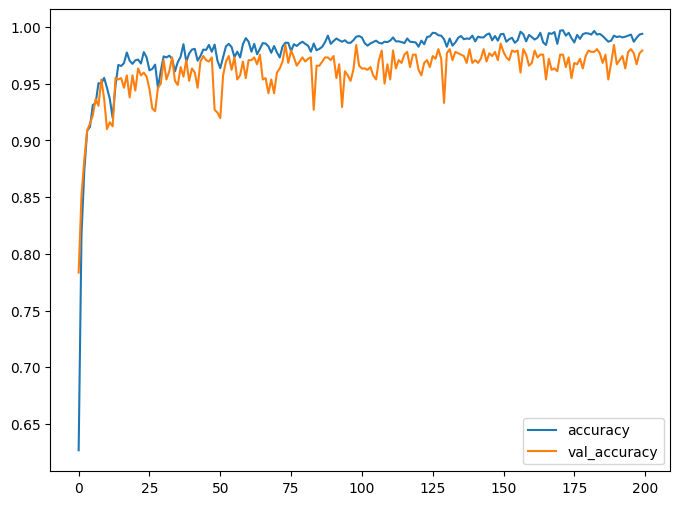

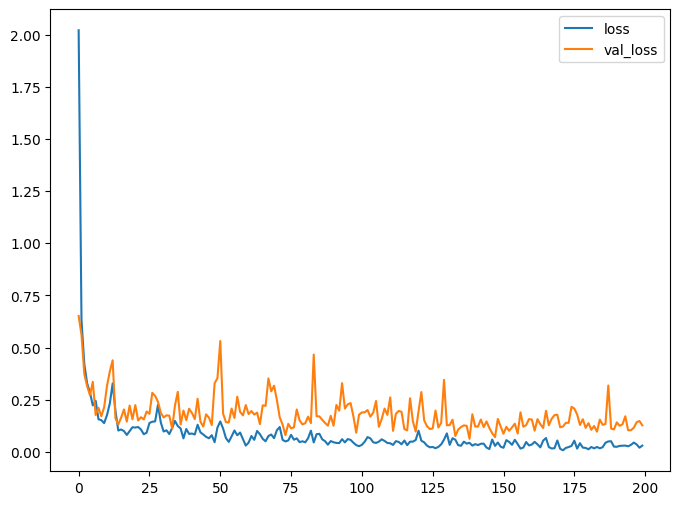

In [66]:
accuracyPlot = plt.figure()
plt.close('all')
plt.figure(1, figsize=(8,6))
plt.plot(hist.history['accuracy'],label = 'accuracy')
plt.plot(hist.history['val_accuracy'],label = 'val_accuracy')
plt.legend()
#plt.savefig('PartClassification/AccuracyNet1.png', dpi=300)

plt.figure(2, figsize=(8,6))
plt.plot(hist.history['loss'],label = 'loss')
plt.plot(hist.history['val_loss'],label = 'val_loss')
plt.legend()
#plt.savefig('PartClassification/LossNet1.png', dpi=300)
plt.show()

In [67]:
predictY = model.predict(testX).argmax(axis=1)
testY = np.argmax(testY_cat, axis=-1)
conf_matrix = confusion_matrix(testY,predictY)
ConfusionMatrixDisplay.from_predictions(testY,predictY)

ResourceExhaustedError:  OOM when allocating tensor with shape[32,64,147,147] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[node model/xception/block1_conv2_bn/FusedBatchNormV3 (defined at \AppData\Local\Temp\ipykernel_2432\177538605.py:5) ]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info. This isn't available when running in Eager mode.
 [Op:__inference_predict_function_930597]

Function call stack:
predict_function
